#  <center> LOAN PREDICTION

### Business Objective

A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

### Data Understanding

The dataset resembles a real-world dataset and has many of the same challenges. It has:

Missing values

Spelling differences

Punctuation format

Duplicates rows

### Data Preparation

Split your data into training and testing

Start with Exploratory data analysis

Data cleaning

Handling the missing values

Transform categorical data into numeric

Feature Engineering (such as credit utilization)

The goal is to clean the dataset and get it ready for the Algorithms


### Modeling

Algorithm Selection

Depending on the question at hand you can decide which algorithm
to choose

### Classification Question

Pick a classification algorithm

Regression based

Tree based

Distance based

Probability based

Model Evaluation

Evaluation criteria

### Modeling

Pick an algorithm

Train the algorithm using training data

Evaluate the trained model

Use the trained model to predict who is a good customer on test data

Come up with questions to ask the customer when they

apply for a loan

#### Importing Required Packages

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


#### Importing Data

In [206]:
df = pd.read_csv("LoanPrediction/LoansTrainingSet.csv")

### EDA - Exploratory Data Analysis

In [207]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [209]:
df.isnull().sum()   

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

### Correction of some types in the data

In [210]:
# drop loan Id and customer Id
df.drop(["Loan ID","Customer ID"], axis=1, inplace=True)

In [211]:
df["Current Loan Amount"] = df["Current Loan Amount"].replace(99999999, np.nan)

In [212]:
# replace the "other" values with the "Other" value on Purpose column
df["Purpose"] = df["Purpose"].str.replace("other", "Other")

In [213]:
df["Monthly Debt"] = df["Monthly Debt"].str.replace("$", "").str.replace(",", "")
df["Monthly Debt"] = df["Monthly Debt"].str.strip()
df["Monthly Debt"] = df["Monthly Debt"].astype(float)

In [214]:
df['Years in current job'] = df['Years in current job'].replace({
    '< 1 year': 0,
    '10+ years': 10
})
df['Years in current job'] = df['Years in current job'].str.extract('(\d+)').astype(float)


In [215]:
df[df['Maximum Open Credit'] == "#VALUE!"]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,Charged Off,1470.0,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,Charged Off,1470.0,Short Term,725.0,2.0,Rent,39200.0,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,Charged Off,23897.0,Long Term,6970.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0
187513,Charged Off,23897.0,Long Term,697.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0


In [216]:
df['Maximum Open Credit'].replace('0', 0,inplace=True)
df['Maximum Open Credit'].replace('#VALUE!', np.nan,inplace=True)   
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)

In [217]:
df["Credit Score"] = df["Credit Score"].apply(lambda x: x / 10 if x > 1000 else x)

In [218]:
df.duplicated().sum()
df.drop_duplicates()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520.0,Short Term,741.0,NaN,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,Fully Paid,3441.0,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,Fully Paid,21029.0,Short Term,747.0,NaN,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,Fully Paid,18743.0,Short Term,747.0,NaN,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,Fully Paid,11731.0,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,Charged Off,11953.0,Short Term,717.0,NaN,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1.0,0.0
256979,Fully Paid,3911.0,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,1706.58,19.9,NaN,16,0,43992,44080.0,0.0,0.0
256980,Fully Paid,5078.0,Short Term,737.0,NaN,Own Home,77186.0,Debt Consolidation,1376.47,19.1,47.0,9,0,1717,9758.0,0.0,0.0
256981,Charged Off,12116.0,Short Term,746.0,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.1,82.0,8,0,3315,20090.0,0.0,0.0


In [219]:
df['Credit Score'].value_counts()

Credit Score
740.0    5877
747.0    5862
741.0    5843
746.0    5736
742.0    5531
         ... 
590.0      22
589.0      22
585.0      21
593.0      19
591.0      18
Name: count, Length: 167, dtype: int64

In [220]:
df.shape

(256984, 17)

In [221]:
df.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,221774.000000,195308.000000,145600.000000,1.953080e+05,256984.000000,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,2.569800e+05,256455.000000,256961.000000
mean,13979.687389,721.203197,4.478194,7.195272e+04,963.310424,18.290195,34.881450,11.106267,0.156628,1.540656e+04,3.572350e+04,0.110316,0.027203
std,8260.519207,27.719518,2.454941,5.887757e+04,634.119410,7.075747,21.854165,4.982982,0.460731,1.966506e+04,5.550080e+05,0.336229,0.245950
min,505.000000,585.000000,1.000000,0.000000e+00,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7819.000000,710.000000,2.000000,4.432100e+04,531.992500,13.500000,16.000000,8.000000,0.000000,5.974000e+03,1.277800e+04,0.000000,0.000000
50%,12058.000000,730.000000,4.000000,6.124200e+04,844.520000,17.000000,32.000000,10.000000,0.000000,1.107800e+04,2.174000e+04,0.000000,0.000000
75%,19438.750000,741.000000,6.000000,8.646200e+04,1252.452500,21.700000,51.000000,14.000000,0.000000,1.931900e+04,3.617125e+04,0.000000,0.000000
max,41000.000000,751.000000,9.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,11.000000,1.731412e+06,1.763322e+08,7.000000,11.000000


### Data Visualization  

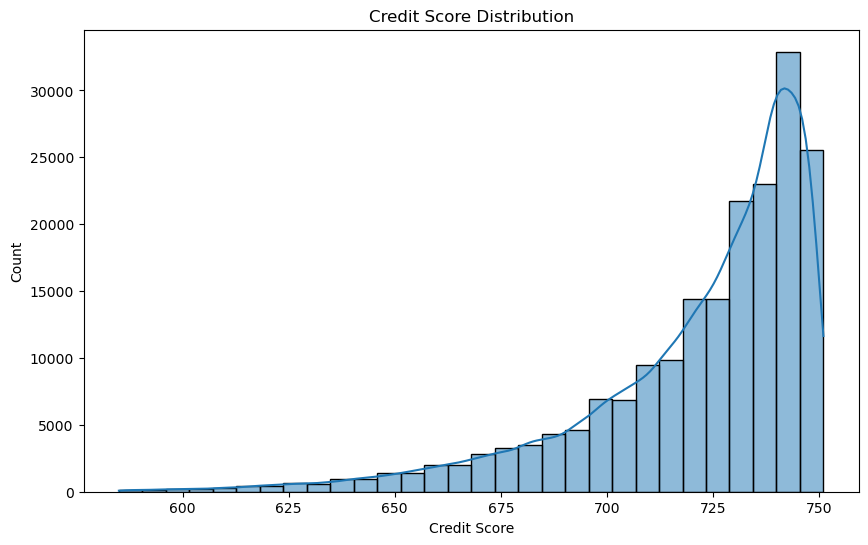

In [222]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit Score'], bins=30, kde=True)
plt.title('Credit Score Distribution')
plt.show()

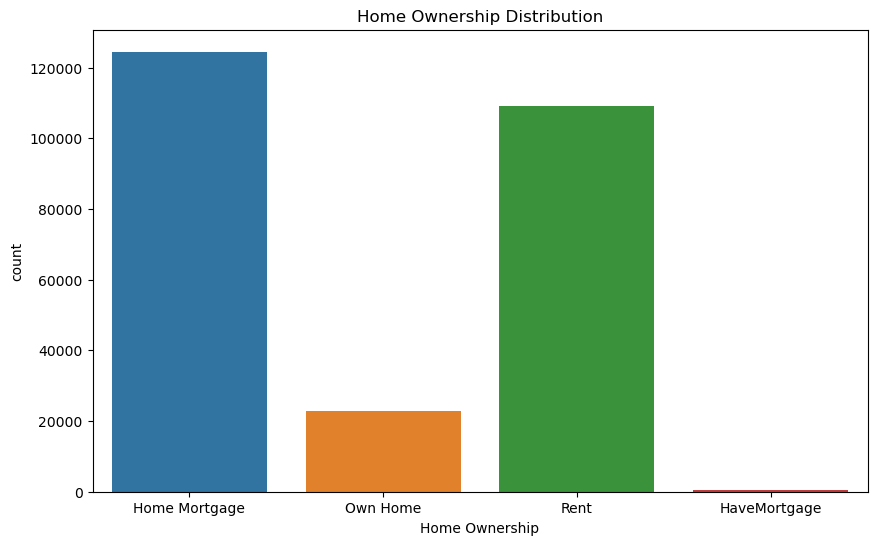

In [223]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Home Ownership', data=df)
plt.title('Home Ownership Distribution')
plt.show()

<Axes: xlabel='Annual Income', ylabel='Credit Score'>

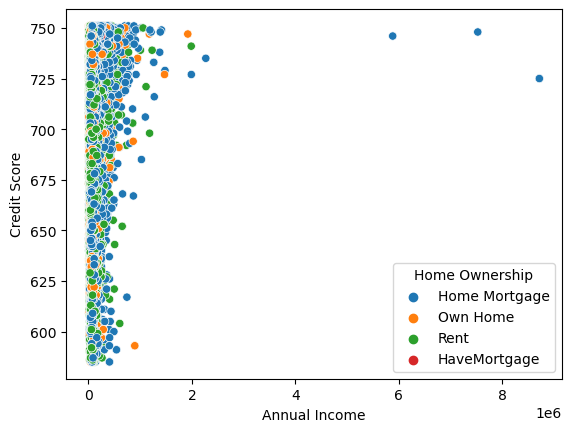

In [262]:
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Home Ownership' ,data=df)


<Axes: xlabel='Credit Score', ylabel='Monthly Debt'>

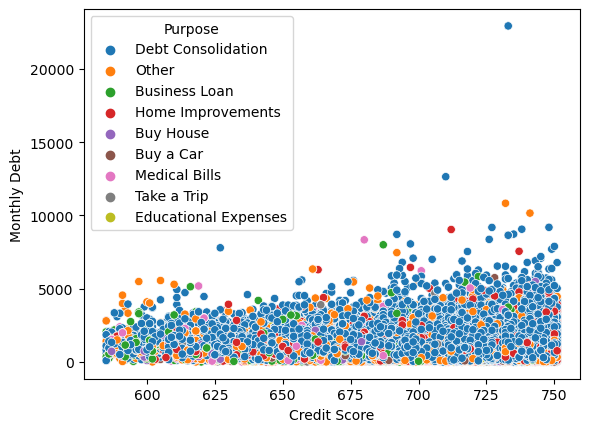

In [264]:
sns.scatterplot(x='Credit Score', y='Monthly Debt', hue='Purpose', data=df)


<Axes: xlabel='Current Loan Amount', ylabel='Monthly Debt'>

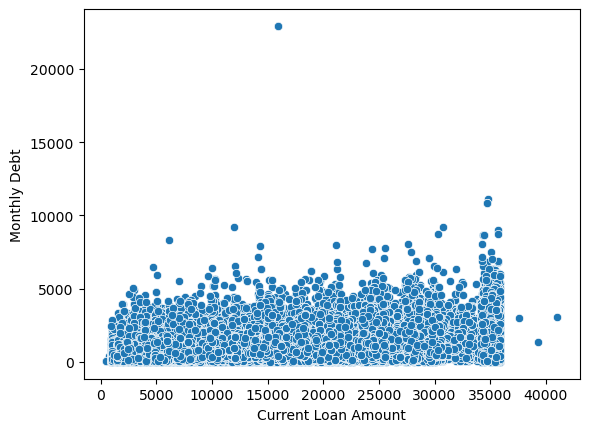

In [226]:
sns.scatterplot(x='Current Loan Amount', y='Monthly Debt', data=df)


<Axes: xlabel='Credit Score', ylabel='Years of Credit History'>

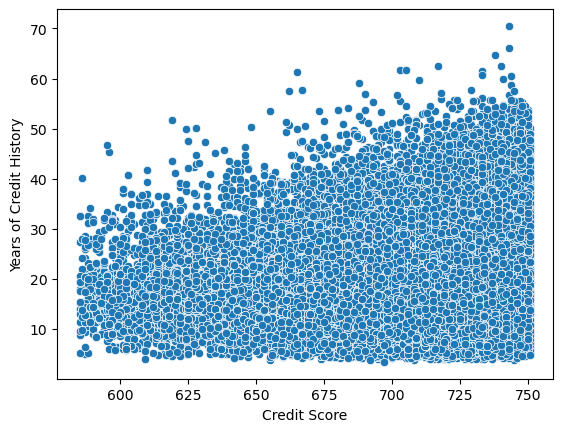

In [227]:
sns.scatterplot(x='Credit Score', y='Years of Credit History', data=df)

In [228]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.233733,0.059733,0.335476,0.434637,0.151483,-0.041492,0.200721,-0.074879,0.320556,0.042283,-0.097703,0.012584
Credit Score,-0.233733,1.000000,-0.016535,0.012355,-0.092755,0.085627,0.046358,-0.043592,-0.057502,-0.016729,0.010556,-0.043005,-0.027244
Years in current job,0.059733,-0.016535,1.000000,0.026313,0.057390,0.071901,0.022647,0.019648,0.033659,0.034181,-0.001762,0.031565,0.010295
Annual Income,0.335476,0.012355,0.026313,1.000000,0.454638,0.146859,-0.059675,0.140463,-0.013672,0.292165,0.030140,-0.044837,0.038185
Monthly Debt,0.434637,-0.092755,0.057390,0.454638,1.000000,0.188646,-0.056377,0.410416,-0.052792,0.472581,0.026433,-0.078440,0.020557
Years of Credit History,0.151483,0.085627,0.071901,0.146859,0.188646,1.000000,-0.039695,0.128033,0.061251,0.201001,0.021798,0.062049,0.020915
Months since last delinquent,-0.041492,0.046358,0.022647,-0.059675,-0.056377,-0.039695,1.000000,-0.035803,0.088612,-0.024292,-0.000541,0.112907,0.002730
Number of Open Accounts,0.200721,-0.043592,0.019648,0.140463,0.410416,0.128033,-0.035803,1.000000,-0.013731,0.222763,0.019305,-0.022805,0.005754
Number of Credit Problems,-0.074879,-0.057502,0.033659,-0.013672,-0.052792,0.061251,0.088612,-0.013731,1.000000,-0.103814,-0.008329,0.755866,0.584917
Current Credit Balance,0.320556,-0.016729,0.034181,0.292165,0.472581,0.201001,-0.024292,0.222763,-0.103814,1.000000,0.111659,-0.117995,-0.011118


In [229]:
# We will try to predict the missing values by training the non-missing values

In [230]:
df.isnull().sum()   

Loan Status                          0
Current Loan Amount              35210
Term                                 0
Credit Score                     61676
Years in current job            111384
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  4
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [231]:
full = df.dropna()

In [232]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39540 entries, 6 to 256982
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   39540 non-null  object 
 1   Current Loan Amount           39540 non-null  float64
 2   Term                          39540 non-null  object 
 3   Credit Score                  39540 non-null  float64
 4   Years in current job          39540 non-null  float64
 5   Home Ownership                39540 non-null  object 
 6   Annual Income                 39540 non-null  float64
 7   Purpose                       39540 non-null  object 
 8   Monthly Debt                  39540 non-null  float64
 9   Years of Credit History       39540 non-null  float64
 10  Months since last delinquent  39540 non-null  float64
 11  Number of Open Accounts       39540 non-null  int64  
 12  Number of Credit Problems     39540 non-null  int64  
 13  Curre

In [233]:
full['Tax Liens'].value_counts()

Tax Liens
0.0     38582
1.0       655
2.0       190
3.0        59
4.0        27
5.0         9
6.0         9
7.0         3
9.0         3
8.0         2
10.0        1
Name: count, dtype: int64

In [234]:
full['Credit Score'] = full['Credit Score'].astype(int)
full['Annual Income'] = full['Annual Income'].astype(int)
full['Bankruptcies'] = full['Bankruptcies'].astype(int)
full['Current Loan Amount'] = full['Current Loan Amount'].astype(int)
full['Years in current job'] = full['Years in current job'].astype(int)
full['Months since last delinquent'] = full['Months since last delinquent'].astype(int)
full['Maximum Open Credit'] = full['Maximum Open Credit'].astype(int)
full['Tax Liens'] = full['Tax Liens'].astype(int)



In [235]:
full.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.265455,0.043424,0.328910,0.426805,0.140050,-0.038413,0.179006,-0.054396,0.329061,0.041801,-0.082209,0.018428
Credit Score,-0.265455,1.000000,-0.017135,0.001794,-0.095263,0.072535,0.044973,-0.029727,-0.046773,-0.013473,0.013730,-0.030116,-0.026164
Years in current job,0.043424,-0.017135,1.000000,0.005302,0.039066,0.042384,0.019038,-0.000733,0.013983,0.020611,-0.010865,0.006344,0.005559
Annual Income,0.328910,0.001794,0.005302,1.000000,0.434173,0.140974,-0.054655,0.105960,0.000179,0.268704,0.036202,-0.034148,0.042111
Monthly Debt,0.426805,-0.095263,0.039066,0.434173,1.000000,0.160414,-0.053810,0.375046,-0.025264,0.439759,0.030637,-0.056703,0.035390
Years of Credit History,0.140050,0.072535,0.042384,0.140974,0.160414,1.000000,-0.027646,0.085625,0.059386,0.200455,0.030403,0.050985,0.031484
Months since last delinquent,-0.038413,0.044973,0.019038,-0.054655,-0.053810,-0.027646,1.000000,-0.037217,0.081218,-0.021658,-0.002656,0.098646,0.006458
Number of Open Accounts,0.179006,-0.029727,-0.000733,0.105960,0.375046,0.085625,-0.037217,1.000000,-0.013224,0.217762,0.031562,-0.017248,-0.000452
Number of Credit Problems,-0.054396,-0.046773,0.013983,0.000179,-0.025264,0.059386,0.081218,-0.013224,1.000000,-0.082383,-0.012446,0.690284,0.632786
Current Credit Balance,0.329061,-0.013473,0.020611,0.268704,0.439759,0.200455,-0.021658,0.217762,-0.082383,1.000000,0.128334,-0.101677,0.000068


<Axes: >

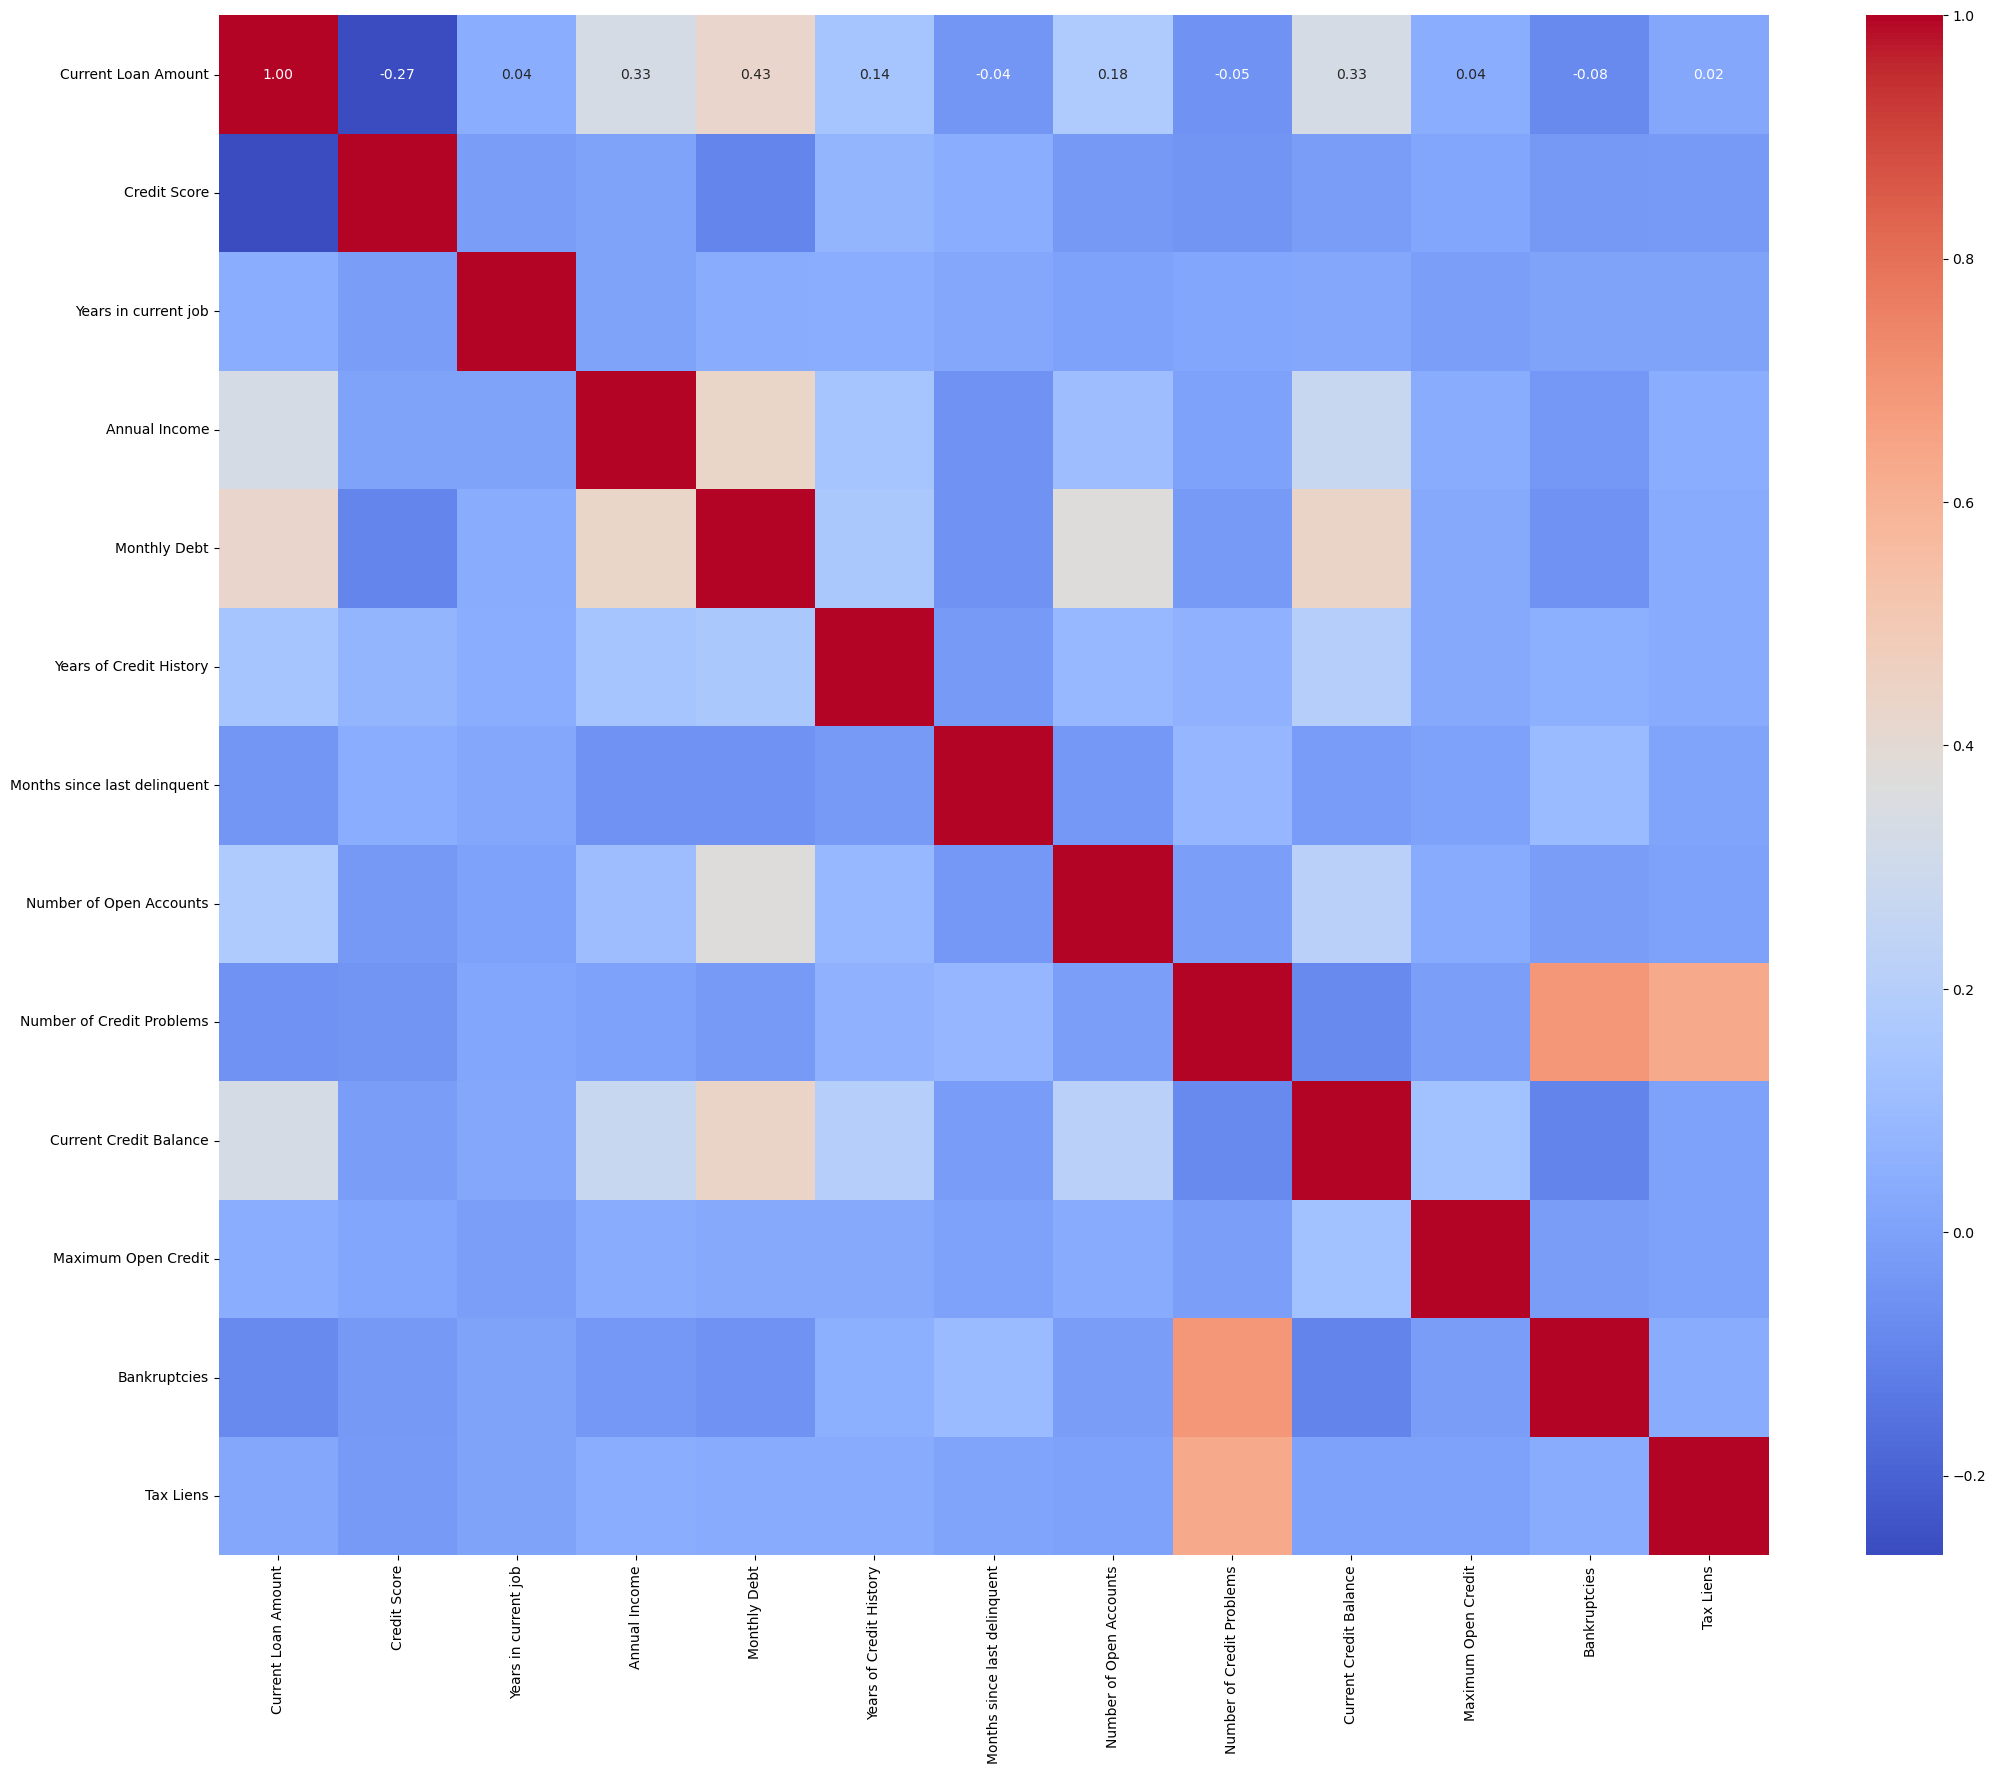

In [236]:
plt.figure(figsize=(25, 20))
sns.heatmap(full.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [254]:
def corr_sort(data, column):
    return abs(data.corr(numeric_only=True)[column]).sort_values(ascending=False)

corr_sort(full, 'Credit Score')  

Credit Score                    1.000000
Current Loan Amount             0.265455
Monthly Debt                    0.095263
Years of Credit History         0.072535
Number of Credit Problems       0.046773
Months since last delinquent    0.044973
Bankruptcies                    0.030116
Number of Open Accounts         0.029727
Tax Liens                       0.026164
Years in current job            0.017135
Maximum Open Credit             0.013730
Current Credit Balance          0.013473
Annual Income                   0.001794
Name: Credit Score, dtype: float64

In [255]:
x = full[['Current Loan Amount', 'Term', 'Purpose', 'Home Ownership', 'Loan Status']]
y = full['Credit Score']

In [256]:
x = pd.get_dummies(x, drop_first=True)

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [258]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,3.616224e-01,2.289115e+01,1.716156e+01
Gradient Boosting,3.600654e-01,2.291905e+01,1.730016e+01
Ridge,3.431522e-01,2.321994e+01,1.749851e+01
Linear,3.431285e-01,2.322036e+01,1.749849e+01
Lasso,3.098208e-01,2.380179e+01,1.807759e+01
KNeighborsRegressor,2.567383e-01,2.470015e+01,1.986630e+01
ElasticNet,1.879725e-01,2.581749e+01,1.980659e+01
Extra Tree,1.072738e-01,2.706997e+01,1.712822e+01
Decision Tree,8.715021e-02,2.737338e+01,1.739365e+01
AdaBoost,1.334337e-02,2.845848e+01,2.125675e+01
